<a href="https://colab.research.google.com/github/UpamaKr/Project-on-Predicting-Diamond-Sales-Price-with-Multiple-Regression-Methods/blob/main/Project_on_Predicting_Diamond_Sales_Price_with_Multiple_Regression_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import joblib

In [3]:
from google.colab import files
files.upload()

Saving diamonds.csv to diamonds.csv


In [4]:
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

Data Preprocessing

In [6]:
data.isnull()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
219699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
219700,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
219701,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.dropna(axis=1, inplace=True)

In [8]:
data.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [9]:
data.nunique()

Unnamed: 0                     219703
cut                                11
color                              11
clarity                            11
carat_weight                      878
cut_quality                         6
lab                                 3
symmetry                            5
polish                              5
eye_clean                           5
culet_size                          9
culet_condition                     4
depth_percent                     534
table_percent                     235
meas_length                      1415
meas_width                       1155
meas_depth                        852
girdle_min                         10
girdle_max                         10
fluor_color                         6
fluor_intensity                     8
fancy_color_dominant_color         13
fancy_color_secondary_color        11
fancy_color_overtone                9
fancy_color_intensity              10
total_sales_price               22202
dtype: int64

In [10]:
data.drop(columns='Unnamed: 0', inplace=True)

In [11]:
data.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [12]:
data[data.duplicated()]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
111,Round,L,I2,0.31,Very Good,GIA,Very Good,Very Good,unknown,unknown,...,2.75,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,274
238,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,326
240,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,326
241,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,326
276,Round,F,VVS2,0.14,Excellent,IGI,Excellent,Excellent,unknown,unknown,...,0.00,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219494,Radiant,unknown,VS1,15.95,unknown,GIA,Good,Very Good,unknown,unknown,...,8.57,M,STK,unknown,Faint,Yellow,unknown,None,Fancy,378829
219506,Radiant,G,VS2,9.05,unknown,GIA,Very Good,Very Good,Yes,N,...,7.55,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,385128
219542,Emerald,K,VS2,15.14,unknown,GIA,Very Good,Excellent,Yes,N,...,7.78,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,420529
219551,Princess,G,VS2,9.05,unknown,GIA,Very Good,Very Good,Yes,N,...,7.55,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,431217


In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


use of label encoder to change Categorical Values

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
lnc = LabelEncoder()

In [17]:
df = data.copy()

In [18]:
for i in data:
    r=data[i].dtypes
    if r== 'object':
        df[i]= lnc.fit_transform(data[i])
        joblib.dump(lnc,i+'joblib',compress=9)

In [19]:
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,0.09,0,2,4,4,4,3,...,1.79,0,0,5,2,12,10,8,9,200
1,10,1,10,0.09,4,2,4,4,4,3,...,1.78,1,1,5,2,12,10,8,9,200
2,10,1,10,0.09,0,2,4,4,4,8,...,1.77,4,0,5,2,12,10,8,9,200
3,10,1,10,0.09,0,2,4,4,4,8,...,1.78,0,1,5,2,12,10,8,9,200
4,10,1,10,0.09,4,2,4,0,4,3,...,1.82,1,1,5,2,12,10,8,9,200


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215823 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          215823 non-null  int64  
 1   color                        215823 non-null  int64  
 2   clarity                      215823 non-null  int64  
 3   carat_weight                 215823 non-null  float64
 4   cut_quality                  215823 non-null  int64  
 5   lab                          215823 non-null  int64  
 6   symmetry                     215823 non-null  int64  
 7   polish                       215823 non-null  int64  
 8   eye_clean                    215823 non-null  int64  
 9   culet_size                   215823 non-null  int64  
 10  culet_condition              215823 non-null  int64  
 11  depth_percent                215823 non-null  float64
 12  table_percent                215823 non-null  float64
 13 

Outlier detection

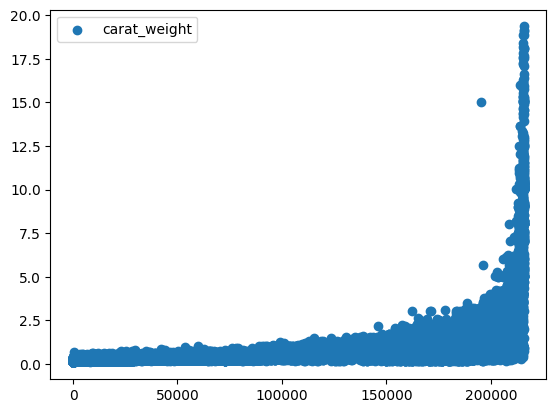

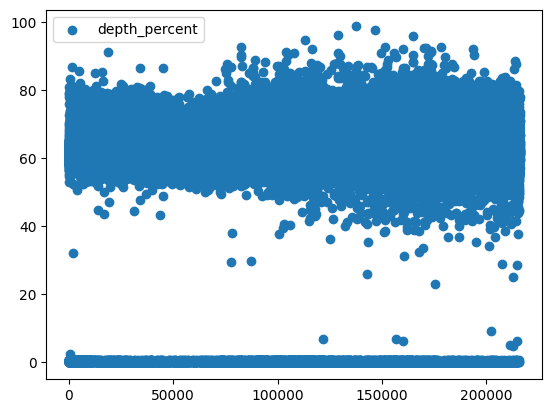

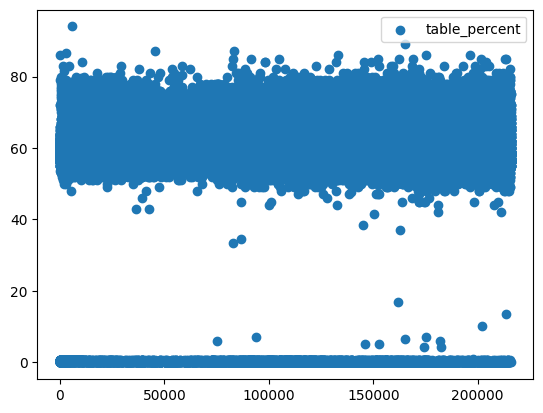

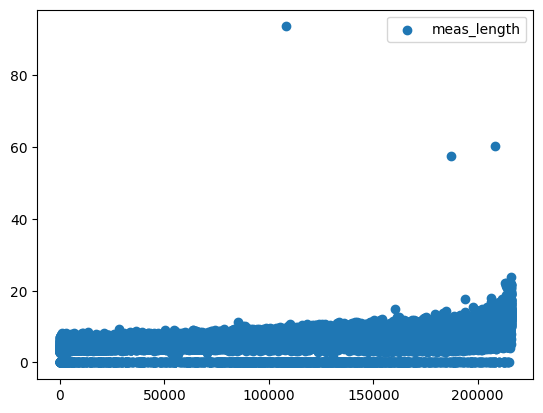

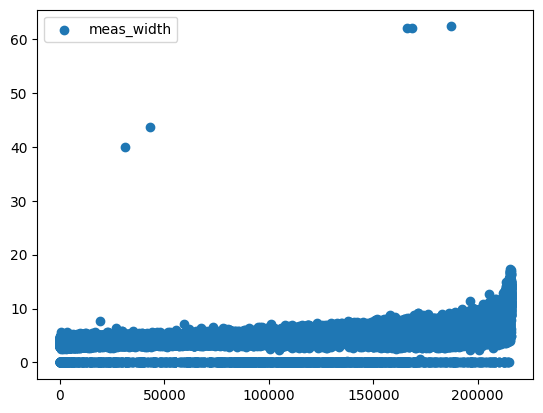

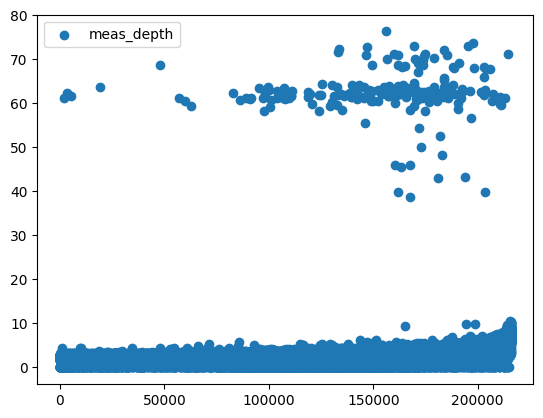

In [22]:
for i in df:
    r= df[i].dtypes
    if r == 'float64':
        plt.scatter(range(len(df[i])), df[i],label=i)
        plt.legend()
        plt.show()

In [23]:
df = df[(df.meas_length < 40)]
df = df[(df.meas_width < 30)]
df = df[(df.meas_depth < 30)]


In [24]:
#checking if measured parameters are 0 or not

In [25]:
df[(df.meas_width == 0) | (df.meas_depth == 0) | (df.meas_length == 0) | (df.depth_percent == 0) | (df.table_percent == 0)]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
24,10,8,0,0.34,0,2,0,0,4,8,...,0.00,9,9,5,2,12,10,8,9,204
25,10,2,9,0.09,0,2,4,4,4,8,...,0.00,9,9,5,2,12,10,8,9,204
26,10,1,9,0.09,4,2,4,4,4,8,...,0.00,9,9,5,5,12,10,8,9,204
44,10,0,7,0.11,0,2,4,0,4,8,...,0.00,9,9,5,2,12,10,8,9,222
45,10,1,7,0.11,0,2,4,4,4,8,...,0.00,9,9,5,2,12,10,8,9,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218830,10,1,4,5.07,0,0,0,4,4,3,...,0.00,9,9,0,1,12,10,8,9,160984
219389,7,10,10,15.52,5,0,4,0,4,8,...,6.34,1,3,5,2,11,1,8,3,302640
219415,10,2,7,6.28,0,0,0,0,4,3,...,7.24,4,4,5,2,12,10,8,9,320733
219530,7,4,7,11.95,5,1,4,0,4,8,...,7.76,1,1,5,1,12,10,8,9,408347


In [26]:
#since it is not substantial we can remove this and store in a different DF to check for model accuracy
df2 = df.copy()
df2 = df2[(df2.meas_width != 0)]
df2 = df2[(df2.meas_depth != 0)]
df2 = df2[(df2.meas_length != 0)]
df2 = df2[(df2.depth_percent != 0) ]
df2 = df2[(df2.table_percent != 0)]

print(df.shape)
print(df2.shape)

(215599, 25)
(210513, 25)


Feature selection and Data splitting

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = MinMaxScaler()

In [28]:
corr = df2.corr()

<Axes: >

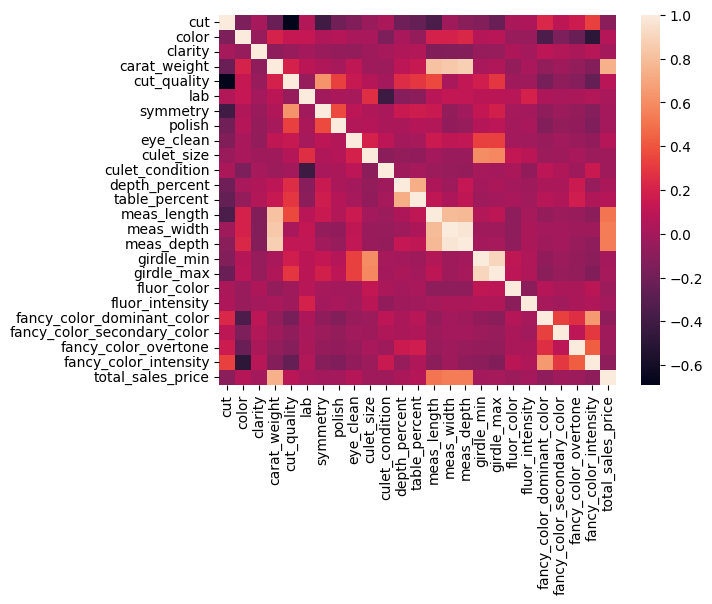

In [29]:
sns.heatmap(corr)

In [31]:
features =[]
for i in df2:
  if i != 'total_sales_price':
    features.append(i)
print(features)

['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


In [32]:
X = df2[features]
y= df2['total_sales_price']
print(X.shape)
print(y.shape)

(210513, 24)
(210513,)


In [33]:
#using f_regression score we can slect k best features
from sklearn.feature_selection import SelectKBest as skb
from sklearn.feature_selection import f_regression

In [34]:
#first we analyze all scores

fs = skb(f_regression,k='all')
fs.fit(X,y)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' %(i,fs.scores_[i]))

Feature 0: 2350.245825
Feature 1: 762.745835
Feature 2: 7.404681
Feature 3: 262560.922842
Feature 4: 1256.060366
Feature 5: 51.814592
Feature 6: 15.197575
Feature 7: 0.755202
Feature 8: 699.842038
Feature 9: 61.599192
Feature 10: 93.900701
Feature 11: 178.097669
Feature 12: 796.564783
Feature 13: 73702.352007
Feature 14: 87254.214321
Feature 15: 87641.854961
Feature 16: 0.246595
Feature 17: 9.204295
Feature 18: 191.829958
Feature 19: 1.597583
Feature 20: 1217.865325
Feature 21: 114.291335
Feature 22: 194.280314
Feature 23: 1492.602215


In [35]:
#now we select 15 best features out of 24 and get their names

fs = skb(f_regression, k = 15)
Xnew = fs.fit_transform(X,y)
f = np.array(features)
filt = fs.get_support()
f = f[filt]
print(f,len(f))

['cut' 'color' 'carat_weight' 'cut_quality' 'eye_clean' 'depth_percent'
 'table_percent' 'meas_length' 'meas_width' 'meas_depth' 'fluor_color'
 'fancy_color_dominant_color' 'fancy_color_secondary_color'
 'fancy_color_overtone' 'fancy_color_intensity'] 15


In [36]:
Xnew = X
y = y.values.reshape(-1,1)
print(Xnew.shape)
print(y.shape)

(210513, 24)
(210513, 1)


In [37]:
#final check
print(Xnew,Xnew.shape)
print(y,y.shape)

        cut  color  clarity  carat_weight  cut_quality  lab  symmetry  polish  \
0        10      1       10          0.09            0    2         4       4   
1        10      1       10          0.09            4    2         4       4   
2        10      1       10          0.09            0    2         4       4   
3        10      1       10          0.09            0    2         4       4   
4        10      1       10          0.09            4    2         4       0   
...     ...    ...      ...           ...          ...  ...       ...     ...   
219698   10      1        7         10.65            0    0         0       0   
219699    9     10        8          5.17            5    0         4       4   
219700   10      1        7         18.07            0    0         0       0   
219701    8     10        5          0.90            5    0         2       2   
219702    7     10       10         10.03            5    0         4       0   

        eye_clean  culet_si

In [38]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(Xnew, y, test_size = 0.2, random_state = 40)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(168410, 24) (168410, 1)
(42103, 24) (42103, 1)


Modelling the regression

In [39]:
#for this we can use the inbuilt LinearRegression model in sklearn
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(X_train, y_train)

print("Intercept: ",mlr.intercept_)
print("Coeffs: ", list(zip(X, mlr.coef_)))


Intercept:  [57387.31758903]
Coeffs:  [('cut', array([ 6.54846500e+02, -7.55673592e+02,  2.74043325e+02,  3.94772630e+04,
       -3.21378156e+01, -2.23263654e+03,  5.43177463e+01,  3.34862964e+00,
        4.05663734e+02, -6.84460728e+00, -2.95345321e+03,  2.72903516e+02,
       -3.41739350e+02, -3.04302778e+03,  4.09984777e+03, -1.86470755e+04,
        2.42452103e+01, -2.60584388e+00,  9.64523922e+01, -3.49304573e+01,
       -2.03363534e+03,  9.70096882e+01,  5.03703412e+02,  4.98463195e+01]))]


In [40]:
y_pred_mlr = mlr.predict(X_test)

In [41]:
#metrics

from sklearn import metrics

MABE = metrics.mean_absolute_error(y_test, y_pred_mlr)
r2 = mlr.score(X_test,y_test)*100

print("R squared score: ",r2)
print("Mean absolute error: ",MABE)

R squared score:  64.33430459425524
Mean absolute error:  4012.884345947611


Model number 2: ANN

In [42]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [43]:
model = Sequential()
model.add(Dense(units = 100, input_dim = 24, kernel_initializer = 'normal', activation='relu'))
model.add(Dense(units = 50, kernel_initializer = 'normal', activation='relu'))
model.add(Dense(1, kernel_initializer = 'normal'))

#Since it is a curve fitting problem loss is MSE
#Lets add a history to track the loss
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train,y_train, validation_split = 0.2, batch_size = 2000, epochs = 50, verbose = 1 )





Epoch 1/50
68/68 [==============================] - 4s 17ms/step - loss: 749615424.0000 - val_loss: 689589184.0000
Epoch 2/50
68/68 [==============================] - 1s 11ms/step - loss: 731964544.0000 - val_loss: 655035008.0000
Epoch 3/50
68/68 [==============================] - 1s 12ms/step - loss: 700135936.0000 - val_loss: 640598080.0000
Epoch 4/50
68/68 [==============================] - 1s 11ms/step - loss: 695140928.0000 - val_loss: 638655872.0000
Epoch 5/50
68/68 [==============================] - 1s 12ms/step - loss: 692898560.0000 - val_loss: 636090240.0000
Epoch 6/50
68/68 [==============================] - 1s 11ms/step - loss: 689776256.0000 - val_loss: 632532224.0000
Epoch 7/50
68/68 [==============================] - 1s 10ms/step - loss: 685072000.0000 - val_loss: 626599872.0000
Epoch 8/50
68/68 [==============================] - 0s 7ms/step - loss: 677222144.0000 - val_loss: 616363136.0000
Epoch 9/50
68/68 [==============================] - 0s 6ms/step - loss: 663611072

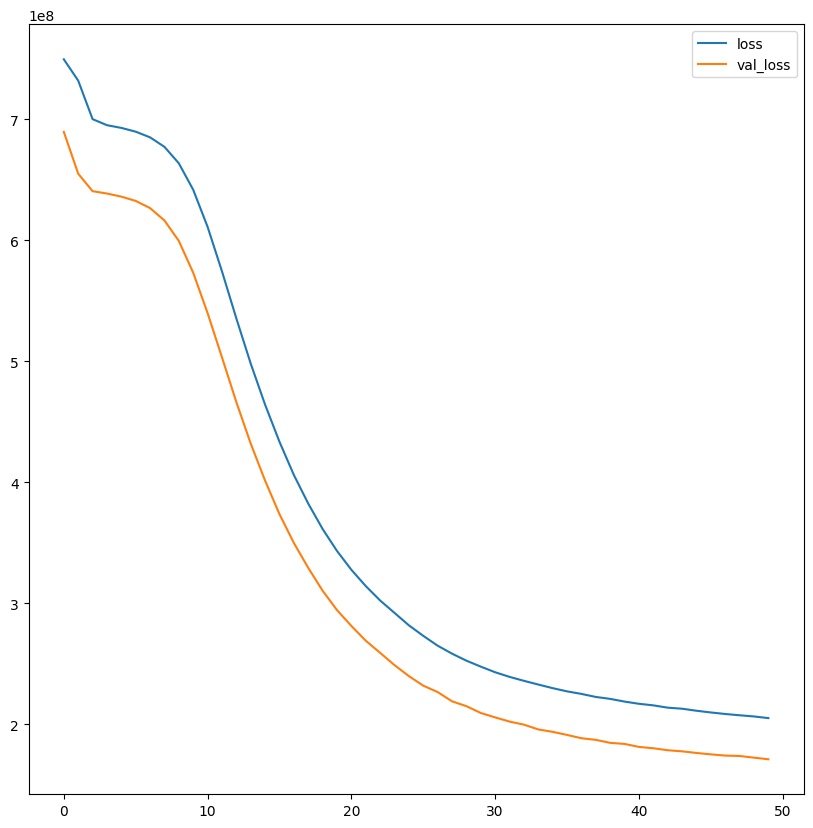

In [44]:
#plotting loss curve
'''
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()
'''

pd.DataFrame(history.history).plot(figsize = (10,10))
plt.show()

In [45]:
#predictions

pred = model.predict(X_test)
#pred_denorm = pred*(maxiy-miniy) + miniy
#y_test_denorm = y_test*(maxiy-miniy) + miniy


from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)*100

print("R Squared: ",r2)

1316/1316 [==============================] - 3s 2ms/step
R Squared:  73.19137854801805


[2323.2615]
[1684]


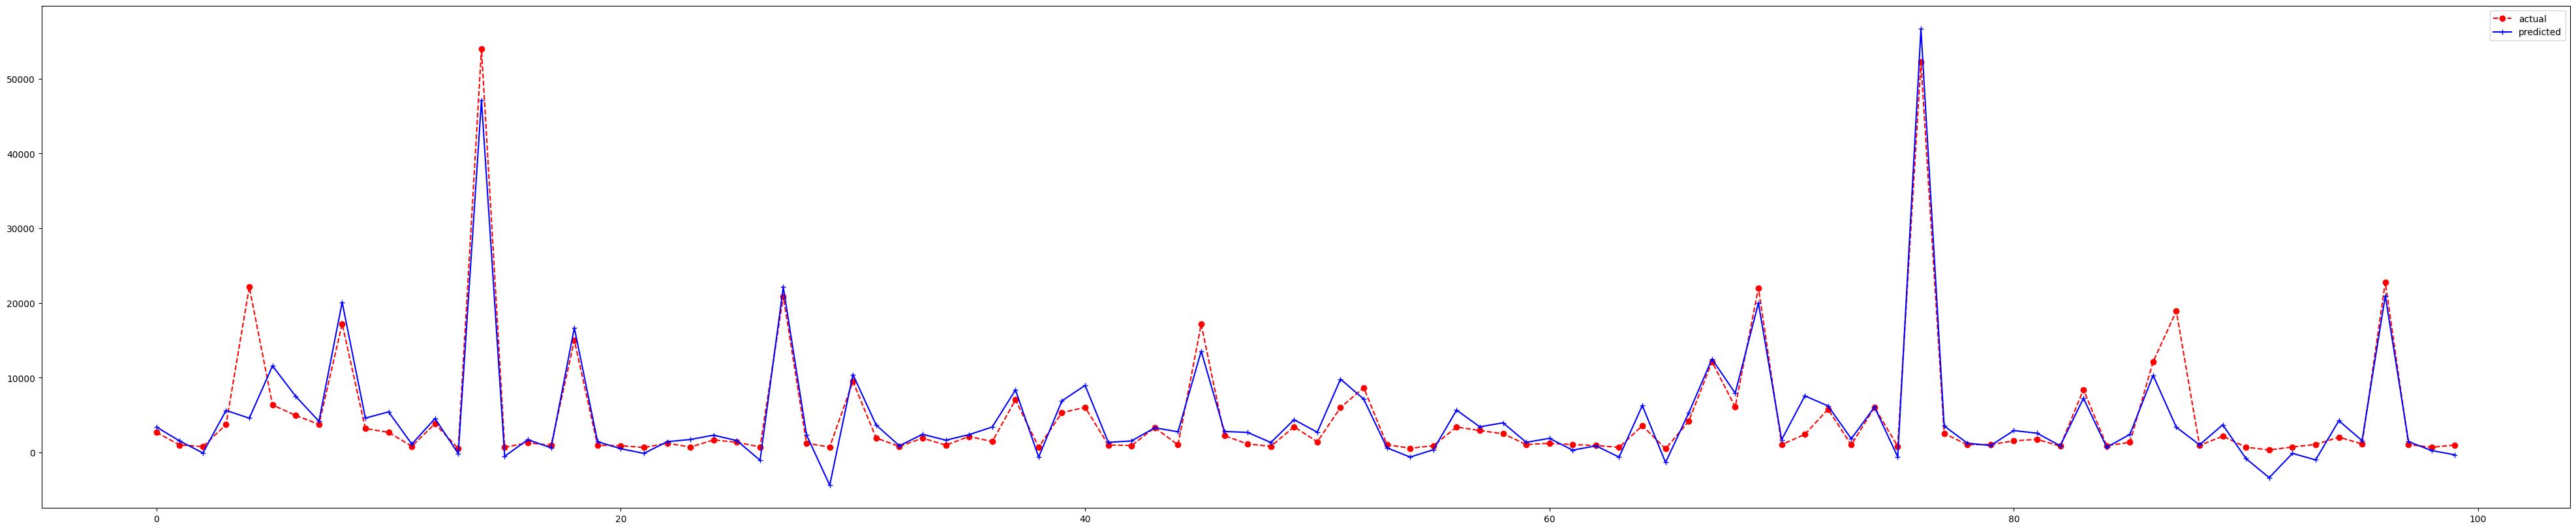

In [46]:
#plotting the fit

print(pred[5024])
print(y_test[5024])
plt.figure(figsize=(50,10))
plt.plot(y_test[5000:5100],'ro--',label='actual')
plt.plot(pred[5000:5100], 'b+-', label='predicted')
plt.legend()
plt.show()

In [52]:
model.save('tf_m_1.0.0.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
from tensorflow import keras
model = keras.models.load_model('my_model.keras')